# Pymaceuticals Inc.
---

### Analysis

This was a challenging but enjoyable assignment. It was empowering to take all this data and to transform it into simple and clear tables and figures for end users to analyze. 
 
I started with importing dependencies as well as the two csv files provided and converting them and merging them into one DataFrame. I then cleaned up the data by dropping a duplicate mouse by its ID number and creating a clean DataFrame without the duplicate.

Next up, statistics! I generated a summary statistics table for all drugs which showed the mean, median, variance, standard deviation, and the standard error of the mean by using groupby, summary statistical methods, and the aggregation method. I created a DataFrame to hold this data. 

Then came the charts and figures. First, I created two bar charts (one with Pandas and the other with PyPlot) that showed the number of observed mousepoints for each drug regimen. I then generated two pie charts (one with Pandas and the other with PyPlot) that showed the distribution of male vs female mice in the study.

I then calculated the final tumor volume at the greatest timepoint for mice taking Capomulin, Ramicane, Infubinol, and Ceftamin. This dataFrame was merged with the original clean DataFrame, and I calculated the IQR for each of these drugs and determined whether or not there were any potential outliers (only 1 in Infubinol). This was displayed in a box and whisker plot. 

I then created a line graph of tumor volume vs. time point for a single mouse treated with Capomulin, and then a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen. Finally, I calculated the correlation coefficient and generated a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen.

The linear regression model opened my eyes to the fact that the weight of the mouse and the average size of the tumor for any given mouse has acorrelation coefficient of 0.84. This means there is a strong correlation between these two variables. The heavier a mouse, the larger it's average tumor size. We only did a deep dive on Capomulin, but it can be tempting to think that, based on the box and whisker plot, that Capomulin and Ramicane were the most effective drugs because the tumor sizes were smallest, but it could also be that the mice taking those drugs were lighter than the mice taking Infubinol and Ceftamin. Therefore, their tumors may have been smaller to begin with compared to the tumors of the mice on Infubinol and Ceftamin. 

Infubinol may be considered the more effective drug considering it had one positive outlier for tumor volume size at the greatest endpoint. It was the only drug with an outlier, and it's outlier was on the lower endpoint side. This means that the tumor for this mouse was much smaller that it's greatest endpoint compared to the rest.

The studies of Capomulin and Ramicane's effect on tumor sizes in mice were the most complete sets of data, since they had the most timepoints observed. A longer study accumulates more data, and the more data available, the more accurate and trustworthy the results.  

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
combined_df['Mouse ID'].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = combined_df[combined_df['Mouse ID'] != 'g989']
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [58]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics.columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], ['mean', 'median', 'var', 'std', 'sem']])
summary_statistics


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

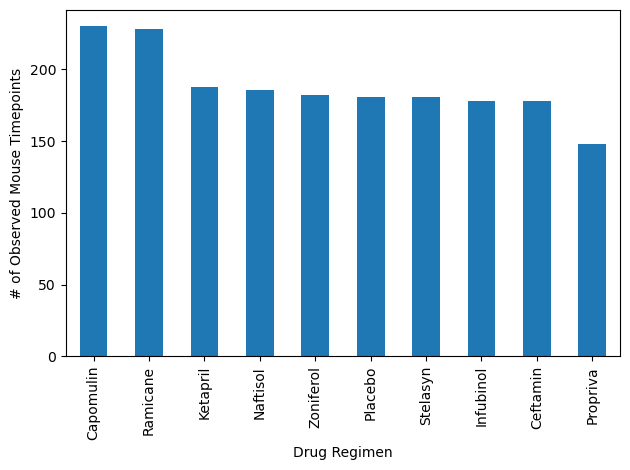

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_mouse_df['Drug Regimen'].value_counts().plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.tight_layout()
plt.show()

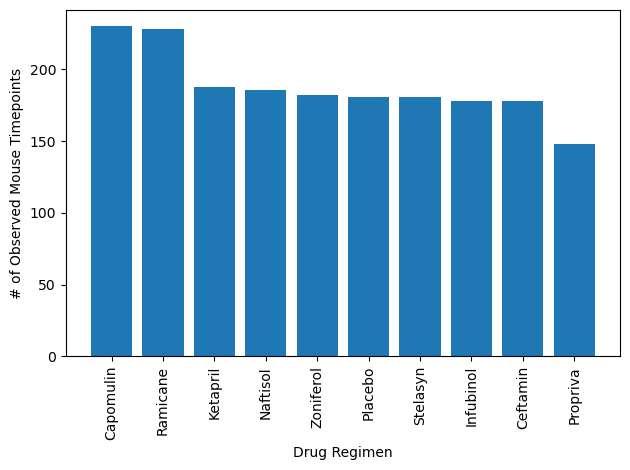

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clean_mouse_df['Drug Regimen'].value_counts()
plt.bar(drug_regimen_counts.index, drug_regimen_counts)
plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()

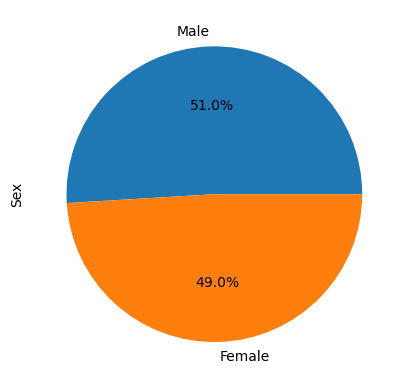

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_mouse_df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=clean_mouse_df['Sex'].value_counts().index)
plt.ylabel('Sex')
plt.show()

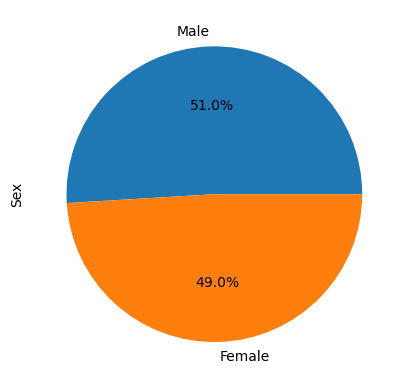

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = clean_mouse_df['Sex'].value_counts().index
sizes = clean_mouse_df['Sex'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = clean_mouse_df[clean_mouse_df['Drug Regimen'].isin(four_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = filtered_df.groupby('Mouse ID')['Timepoint'].max()
max_timepoint

Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 100, dtype: int64

In [14]:
#Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint, clean_mouse_df, how="left", on=["Mouse ID", "Timepoint"])
merged_df = merged_df.reset_index(drop=True)
merged_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
four_regimens
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for x in four_regimens:
    tumor_volume_values = merged_df.loc[merged_df['Drug Regimen'] == x, 'Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_volume_values) 
    
    #Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volume_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    #Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_volume_values[(tumor_volume_values < lower_bound) | (tumor_volume_values > upper_bound)]
    print(f"\n{x}'s potential outliers: {outliers}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


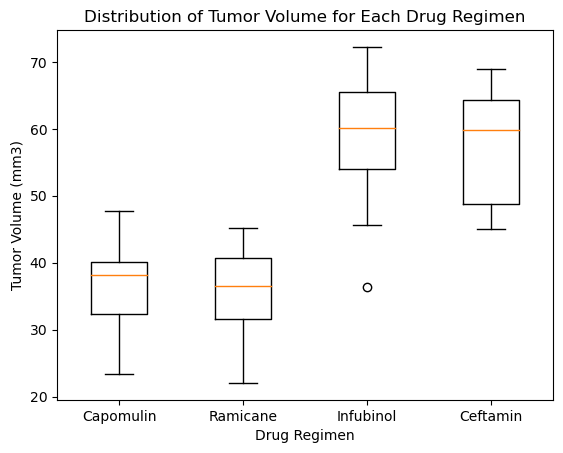

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=four_regimens)
plt.title('Distribution of Tumor Volume for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

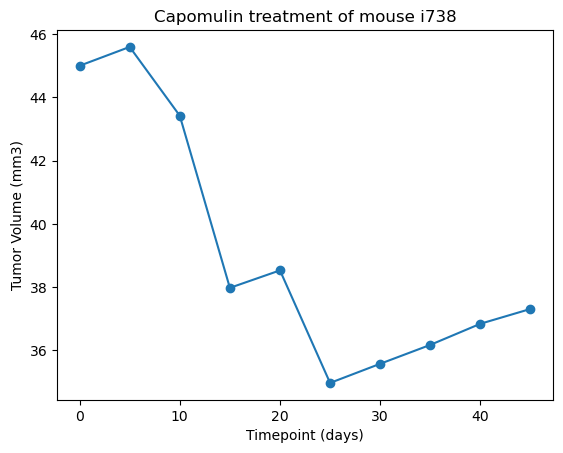

In [64]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_mouse_df[clean_mouse_df['Drug Regimen'] == 'Capomulin']
random_mouse = capomulin_data['Mouse ID'].sample().iloc[0]
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == random_mouse]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-')
plt.title(f"Capomulin treatment of mouse {random_mouse}")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

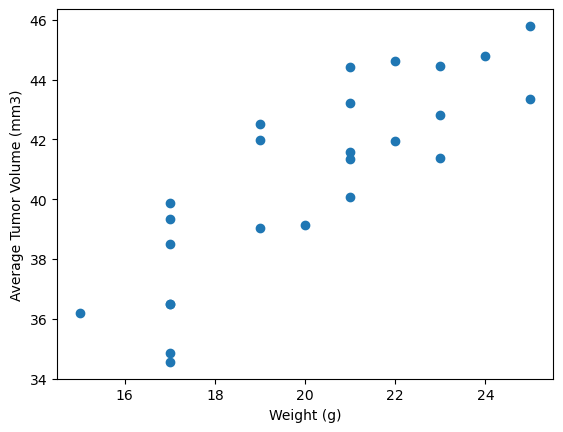

In [62]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
merged_data = pd.merge(capomulin_data, average_tumor_volume, on='Mouse ID', suffixes=('_original', '_average'))
unique_capomulin_data = merged_data.drop_duplicates(subset='Mouse ID')
plt.scatter(unique_capomulin_data['Weight (g)'], unique_capomulin_data['Tumor Volume (mm3)_average'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


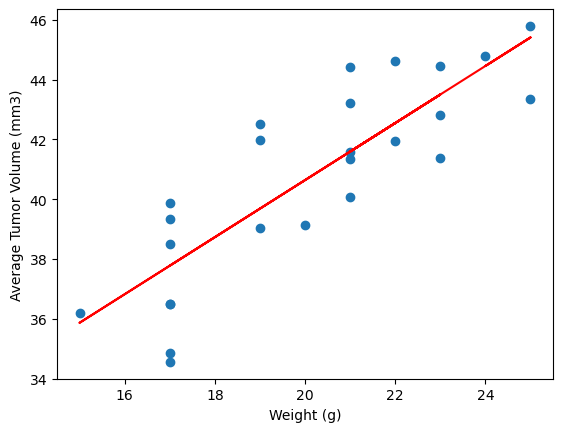

In [55]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import pearsonr, linregress
correlation_coefficient, _ = pearsonr(unique_capomulin_data['Weight (g)'], unique_capomulin_data['Tumor Volume (mm3)_average'])
formatted_cc = round(correlation_coefficient, 2)
print(f'The correlation between mouse weight and average tumor volume is {formatted_cc}')

slope, intercept, r_value, p_value, std_err = linregress(unique_capomulin_data['Weight (g)'], unique_capomulin_data['Tumor Volume (mm3)_average'])
plt.scatter(unique_capomulin_data['Weight (g)'], unique_capomulin_data['Tumor Volume (mm3)_average'])
regression_line = slope * unique_capomulin_data['Weight (g)'] + intercept
plt.plot(unique_capomulin_data['Weight (g)'], regression_line, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()